# Explorando o Dataset Boston Housing
#### Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [1]:
# Importando módulos
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# O dataset boston housing já está disponível no scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
# verificamos que o dataset tem 506 linhas e 13 colunas
boston.data.shape

(506, 13)

In [5]:
# Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Convertendo o dataset em um DataFrame do pandas
dataFrame = pd.DataFrame(boston.data)
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# boston.target é uma array com o preço das casas
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# Convertendo o título das colunas
dataFrame.columns = boston.feature_names

In [10]:
# Adicionando o preço da casa ao DataFrame
dataFrame['PRICE'] = boston.target
dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Prevendo o Preço das Casas em Boston
#### Y - Variável dependente (Target - preço das casas de boston)
#### X - Variável independente ou explanatória (todas as outras características da casa)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Não queremos o preço da casa como variável dependente
X = dataFrame.drop('PRICE', axis = 1)

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [14]:
# Definindo Y
Y = dataFrame.PRICE

In [15]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

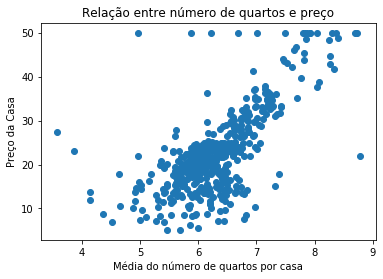

In [16]:
plt.scatter(dataFrame.RM, Y)
plt.xlabel('Média do número de quartos por casa')
plt.ylabel('Preço da Casa')
plt.title('Relação entre número de quartos e preço')
plt.show()

# Nitidamente, há uma relação do preço e o número de quartos

In [17]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [18]:
type(regr)

sklearn.linear_model.base.LinearRegression

In [19]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Coeficiente
print('Coeficiente: {}'.format(regr.intercept_))
print('Número de Coeficientes: {}'.format(len(regr.coef_)))

Coeficiente: 36.45948838509024
Número de Coeficientes: 13


In [21]:
# prevendo o preço da casa
regr.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

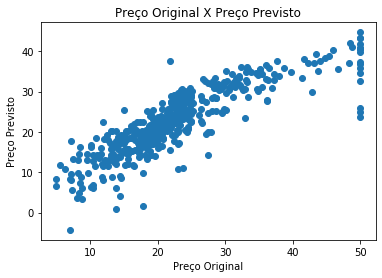

In [22]:
# Comparando preços originais x preços previstos
plt.scatter(dataFrame.PRICE, regr.predict(X))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original X Preço Previsto')
plt.show()

# Veja alguns erros na última coluna ->

## É visível alguns erros na predição da casa

In [24]:
# Calcular o MSE (Mean Squared Error)
mse1 = np.mean((dataFrame.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.89483118172923


#### MSE = Taxa de Erro, sendo o valor original subtraído pelo valor previsto e então multiplicado ao quadrado e passado pela função MEAN do NumPy

In [25]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], dataFrame.PRICE)
mse2 = np.mean((dataFrame.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376928


### O MSE aumentou, indicando que um único atributo da casa não é um bom predictor para o preço das casas
#### Na prática, você não vai implementar regressão linear em todo dataSet. Você vai dividir o dataset em datasets de treino e \nde teste. Assim você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de\nteste. Vejamos:

In [27]:
# Dividindo X em dados de Treino e de teste, sendo X o DataFrame todo
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste, Sendo Y o DataFrame de preços
Y_treino = Y[:-50]
Y_teste = Y[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)
# A quantidade de linhas de Y deve ser igual a de X

(456, 13) (50, 13) (456,) (50,)


#### Podemos criar nossos datasets de treino de forma manual, mas claro este não é o método correto.\nVamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Dividindo X e Y em dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, dataFrame.PRICE, test_size = 0.30, random_state = 5)

In [30]:
# Print shape
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [31]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [32]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# def. os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

In [ ]:
# Comparando preços originais X preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel('Residuo')
plt.title('Residual')